In [ ]:
#Installating modules
!pip install XlsxWriter

In [ ]:
#Excel to dataframe
import pandas as pd
df = pd.read_excel('/content/ALLSMILES_label.xlsx', "Sheet2")
print (df)

#Checking BioAssay activity for positive dataset:

In [ ]:
import pandas as pd
import requests
import time  # Import the time module

#Function to retrieve bioassay data from PubChem using SMILES data
def get_bioassay_data(smiles):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
    operation = "compound"
    input_type = "smiles"
    output_type = "assaysummary"

    url = f"{base_url}/{operation}/{input_type}/{smiles}/{output_type}/JSON"

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Error fetching bioassay data for SMILES: {smiles}, Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None

# Initializing a list to store bioassay data
bioassay_data = []

# Applying function to get BioAssay data using SMILES
for smiles in df['CanonicalSMILES']:
    data = get_bioassay_data(smiles)
    bioassay_data.append(data)

    # Adding a time delay
    time.sleep(5)

# Adding a column for Bioassay Data
df['Bioassay Data'] = bioassay_data

# Saving the new Excel file
df.to_excel('/content/ALLSMILES_bioassay_pt1_data.xlsx', index=False)

# Print the DataFrame for verification
print(df)


##Extracting necessary information from the JSON string containing BioAssay data:  *(this code works for only single row structures/SMILES with single BioAssay data entries)*

In [ ]:
import pandas as pd
import json

# Read the Excel file
df = pd.read_excel('/content/ALLSMILES_bioassay_pt1_data.xlsx')

# Function to extract relevant data from JSON
def extract_data_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))  # Ensuring JSON format is correct by changing any single quotes to double quotes
        if 'Table' in data:
            rows = data['Table']['Row']
            if isinstance(rows, list) and len(rows) > 0:
                row = rows[0]  # Getting the first row
                if 'Cell' in row:
                    cells = row['Cell']
                    if isinstance(cells, list):
                        outcome = value = name = 'N/A'  # Default values
                        columns = data['Table']['Columns']['Column']
                        if 'Activity Outcome' in columns:
                            outcome = cells[columns.index('Activity Outcome')]
                        if 'Activity Value [uM]' in columns:
                            value = cells[columns.index('Activity Value [uM]')]
                        if 'Activity Name' in columns:
                            name = cells[columns.index('Activity Name')]
                        return {
                            'Activity Outcome': outcome,
                            'Activity Value [uM]': value,
                            'Activity Name': name
                        }
    except Exception as err:
        print(f"Error extracting data: {err}")
    return None

# Parsing the information in the 'Bioassay Data' column
df['Parsed Data'] = df['Bioassay Data'].apply(extract_data_from_json)

# Expanding the parsed data into separate columns
df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)

print(df[['Activity Outcome', 'Activity Value [uM]', 'Activity Name']])

# Save the cleaned DataFrame to a new Excel file
df.to_excel('/content/ALLSMILES_cleaned_data_bioassaypt1.xlsx', index=False)


##Extracting necessary information from the JSON string containing BioAssay data:  *(this code works multi-row structures/SMILES with many BioAssay data entries)*

In [ ]:
#FOR REMAINING DATA

import pandas as pd
import json

df = pd.read_excel('/content/ALLSMILES_cleaned_data_bioassaypt1.xlsx', sheet_name= 'Sheet3')

def extract_data_from_json(json_string):
    try:
        # Escaping special characters
        json_string = json_string.replace("\\", "\\\\").replace("\"", "\\\"")

        data = json.loads(json_string.replace("'", "\""))  # Correcting single quotes to double quotes
        if 'Table' in data:
            rows = data['Table']['Row']
            if isinstance(rows, list) and len(rows) > 0:
                results = []
                for row in rows:  # Iterating over each row
                    if 'Cell' in row:
                        cells = row['Cell']
                        if isinstance(cells, list):
                            outcome = value = name = 'N/A'  # Default values
                            columns = data['Table']['Columns']['Column']
                            if 'Activity Outcome' in columns:
                                outcome = cells[columns.index('Activity Outcome')]
                            if 'Activity Value [uM]' in columns:
                                value = cells[columns.index('Activity Value [uM]')]
                            if 'Activity Name' in columns:
                                name = cells[columns.index('Activity Name')]
                            results.append({
                                'Activity Outcome': outcome,
                                'Activity Value [uM]': value,
                                'Activity Name': name
                            })
                return results
    except Exception as e:
        print(f"Error extracting data: {e}")
    return None

# Process the 'Bioassay Data' column
df['Parsed Data'] = df['Bioassay Data'].apply(extract_data_from_json)

# Expand the parsed data into separate columns
df = df.explode('Parsed Data')  # Creating a new row for each item in the 'Parsed Data' lists
df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)

print(df[['Activity Outcome', 'Activity Value [uM]', 'Activity Name']])


existing_file_path = '/content/ALLSMILES_cleaned_data_bioassaypt1.xlsx'

with pd.ExcelWriter(existing_file_path, mode='a', engine='openpyxl') as writer:
    # Writing the DataFrame to a new sheet called 'remaining_parse'
    df.to_excel(writer, sheet_name='remaining_parse', index=False)

print(f'Data saved to remaining_parse inside {existing_file_path}')


REPEAT FOR NEXT BATCH:

In [ ]:
df = pd.read_excel('/content/ALLSMILES_bioassay_pt2_data.xlsx')
df

,filename,CanonicalSMILES,BE,Label
0,p_lig6,CC1(CC2=CC(=NC=C2O1)C3=CCN(CC3)S(=O)(=O)C)C4CC...,-11.1,1
1,p_lig24,CC(C)(C)OC(=O)N1C2CCC1CC(C2)NC3=NC=NC(=C3[N+](...,-9.6,1
2,p_lig31,CC1CN(CCN1C2=NC=C(C=N2)OCC3=C(C=NC=C3)C#N)C4=N...,-7.1,1
3,p_lig33,CC(C)C1=NOC(=N1)N2CCC(CC2)CCCNC3=CC4=C(C=C3)C(...,-10.5,1
4,p_lig61,CC1CN(CCN1C2=NC=C(C=N2)OCC3=C(C=NC=C3)C#N)C(=O...,-5.9,1
...,...,...,...,...
353,p_lig127,CCC1CC(=O)NN=C1N2CCC3=C(C2)OC(=N3)C4=CC=CC=C4,-10.1,1
354,p_lig729,CCCC1C(C(=NNC1=O)C2=CC3=C(C=C2)N=C(O3)C4CC4)C,-10.8,1
355,p_lig735,CCCC1C(C(=NNC1=O)C2=CC3=C(C=C2)N=C(O3)C4=CC=C(...,-12.1,1
356,p_lig762,CCCC1C(C(=NNC1=O)C2=CC3=C(C=C2)N=C(O3)C4=CC=CN...,-11.3,1


In [ ]:
## GETTING BIOASSAY ACTIVITY ##

import pandas as pd
import requests
import time  # Import the time module

df = pd.read_excel('/content/ALLSMILES_bioassay_pt2_data.xlsx')


# Function to get bioassay data for a compound using SMILES
def get_bioassay_data(smiles):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
    operation = "compound"
    input_type = "smiles"
    output_type = "assaysummary"

    url = f"{base_url}/{operation}/{input_type}/{smiles}/{output_type}/JSON"

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Error fetching bioassay data for SMILES: {smiles}, Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None

# Initialize a list to store bioassay data
bioassay_data = []

# Getting bioassay data for each SMILES
for smiles in df['CanonicalSMILES']:
    data = get_bioassay_data(smiles)
    bioassay_data.append(data)

    # Add a 5-second delay after each request
    time.sleep(5)

# Adding a column for Bioassay Data
df['Bioassay Data'] = bioassay_data

# Saving the new Excel file
df.to_excel('/content/ALLSMILES_bioassay_pt2_data.xlsx', index=False)

# Print the DataFrame for verification
print(df)


Error fetching bioassay data for SMILES: CC1(CC2=CC(=NC=C2O1)C3=CCN(CC3)S(=O)(=O)C)C4CCN(CC4)C5=NC=C(C=N5)C(F)(F)F, Status Code: 404
Error fetching bioassay data for SMILES: CC(C)(C)OC(=O)N1C2CCC1CC(C2)NC3=NC=NC(=C3[N+](=O)[O-])NC4=C(C=C(C=C4)S(=O)(=O)C)F, Status Code: 404
Error fetching bioassay data for SMILES: CC1CN(CCN1C2=NC=C(C=N2)OCC3=C(C=NC=C3)C#N)C4=NC=C(C=N4)F, Status Code: 400
Error fetching bioassay data for SMILES: CC(C)C1=NOC(=N1)N2CCC(CC2)CCCNC3=CC4=C(C=C3)C(=CO4)O, Status Code: 404
Error fetching bioassay data for SMILES: CC1CN(CCN1C2=NC=C(C=N2)OCC3=C(C=NC=C3)C#N)C(=O)OC(C)(C)C#N, Status Code: 400
Error fetching bioassay data for SMILES: CC1CN(CCN1C2=NC=C(C=N2)OCC3=C(C=NC=C3)C#N)C4=NOC(=N4)C5COCCO5, Status Code: 400
Error fetching bioassay data for SMILES: CC1=C(N=CN=C1OC2CC3CCC(C2)N3C(=O)OC(C)C)OC4=C(N=CC=C4)C, Status Code: 404
Error fetching bioassay data for SMILES: CCC1=CN=C(N=C1)N2CCC(CC2)N3C(=C(C=N3)COC4=CC=C(C=C4)N5C=NN=N5)C#N, Status Code: 400
Error fetching bioa

In [ ]:
## EXTRACTING DATA ##

import pandas as pd
import json

# Read the Excel file
df = pd.read_excel('/content/ALLSMILES_bioassay_pt2_data.xlsx')

# Function to extract relevant data from JSON strings
def extract_data_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))  # Correct single quotes to double quotes
        if 'Table' in data:
            rows = data['Table']['Row']
            if isinstance(rows, list) and len(rows) > 0:
                row = rows[0]  # Get the first row
                if 'Cell' in row:
                    cells = row['Cell']
                    if isinstance(cells, list):
                        outcome = value = name = 'N/A'  # Default values
                        columns = data['Table']['Columns']['Column']
                        if 'Activity Outcome' in columns:
                            outcome = cells[columns.index('Activity Outcome')]
                        if 'Activity Value [uM]' in columns:
                            value = cells[columns.index('Activity Value [uM]')]
                        if 'Activity Name' in columns:
                            name = cells[columns.index('Activity Name')]
                        return {
                            'Activity Outcome': outcome,
                            'Activity Value [uM]': value,
                            'Activity Name': name
                        }
    except Exception as e:
        print(f"Error extracting data: {e}")
    return None

# Process the 'Bioassay Data' column
df['Parsed Data'] = df['Bioassay Data'].apply(extract_data_from_json)

# Expand the parsed data into separate columns
df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)

# Display the resulting DataFrame
print(df[['Activity Outcome', 'Activity Value [uM]', 'Activity Name']])

# Save the cleaned DataFrame to a new Excel file
df.to_excel('/content/ALLSMILES_cleaned_data_bioassaypt2.xlsx', index=False)


Error extracting data: Expecting ',' delimiter: line 1 column 373 (char 372)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 374 (char 373)
Error extracting data: Expecting ',' delimiter: line 1 column 373 (char 372)

<ipython-input-6-a65c956062aa>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)
<ipython-input-6-a65c956062aa>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)
<ipython-input-6-a65c956062aa>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)
<ipython-input-6-a65c956062aa>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.conca

     Activity Outcome  Activity Value [uM]  Activity Name
0                 NaN                  NaN            NaN
1                 NaN                  NaN            NaN
2                 NaN                  NaN            NaN
3                 NaN                  NaN            NaN
4                 NaN                  NaN            NaN
..                ...                  ...            ...
279               NaN                  NaN            NaN
280               NaN                  NaN            NaN
281               NaN                  NaN            NaN
282               NaN                  NaN            NaN
283               NaN                  NaN            NaN

[284 rows x 3 columns]


In [ ]:
## GETTING REMAINING DATA, MODIFY ALLSMILES_cleaned_data_bioassaypt2.xlsx ##
## I didn't need this on the second run ##
import pandas as pd
import json

df = pd.read_excel('/content/ALLSMILES_cleaned_data_bioassaypt2.xlsx', sheet_name= 'Sheet3')

def extract_data_from_json(json_string):
    try:
        # Escape special characters
        json_string = json_string.replace("\\", "\\\\").replace("\"", "\\\"")

        data = json.loads(json_string.replace("'", "\""))  # Correct single quotes to double quotes
        if 'Table' in data:
            rows = data['Table']['Row']
            if isinstance(rows, list) and len(rows) > 0:
                results = []
                for row in rows:  # Iterate over each row
                    if 'Cell' in row:
                        cells = row['Cell']
                        if isinstance(cells, list):
                            outcome = value = name = 'N/A'  # Default values
                            columns = data['Table']['Columns']['Column']
                            if 'Activity Outcome' in columns:
                                outcome = cells[columns.index('Activity Outcome')]
                            if 'Activity Value [uM]' in columns:
                                value = cells[columns.index('Activity Value [uM]')]
                            if 'Activity Name' in columns:
                                name = cells[columns.index('Activity Name')]
                            results.append({
                                'Activity Outcome': outcome,
                                'Activity Value [uM]': value,
                                'Activity Name': name
                            })
                return results
    except Exception as e:
        print(f"Error extracting data: {e}")
    return None

# Process the 'Bioassay Data' column
df['Parsed Data'] = df['Bioassay Data'].apply(extract_data_from_json)

# Expand the parsed data into separate columns
df = df.explode('Parsed Data')  # Create a new row for each item in the 'Parsed Data' lists
df = pd.concat([df, df['Parsed Data'].apply(pd.Series)], axis=1)

# Display the resulting DataFrame
print(df[['Activity Outcome', 'Activity Value [uM]', 'Activity Name']])

# Open the Excel writer
with pd.ExcelWriter(existing_file_path, mode='a', engine='openpyxl') as writer:
    # Write the DataFrame to a new sheet named 'remaining_parse'
    df.to_excel(writer, sheet_name='remaining_parse', index=False)

print(f'Data saved to remaining_parse inside {existing_file_path}')


##GRAPHS FOR PARTIAL POS AND ALL NEG DATA

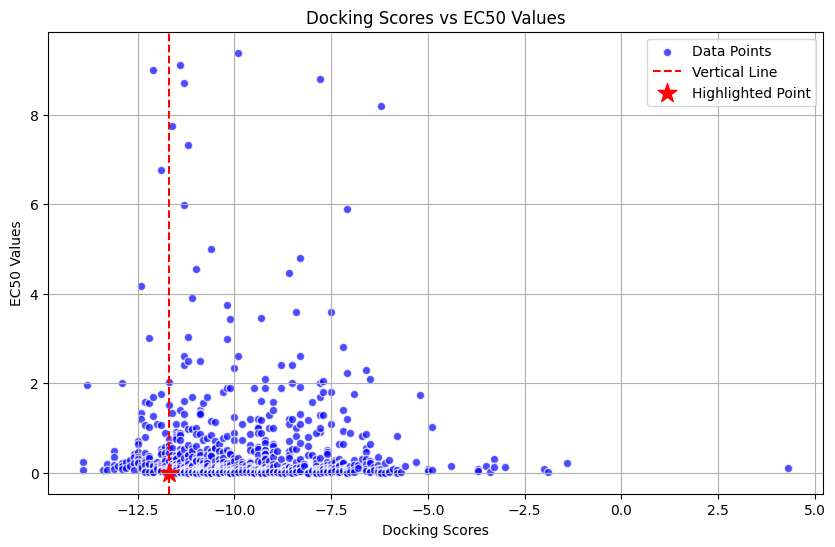

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_excel('/content/Some_pos_all_neg_DATA.xlsx', sheet_name='pos EC50 data')

# Scatter plot with vertical line
plt.figure(figsize=(10, 6))
plt.scatter(df['BE'], df['Activity Value [uM]'], c='blue', alpha=0.7, edgecolors='w', label='Data Points')
plt.axvline(x=-11.7, color='red', linestyle='--', label='Vertical Line')
plt.title('Docking Scores vs EC50 Values')
plt.xlabel('Docking Scores')
plt.ylabel('EC50 Values')
plt.grid(True)
plt.legend()

# Highlight the point (-11.7, 0.0027)
plt.scatter(-11.7, 0.0027, c='red', marker='*', s=200, label='Highlighted Point')
plt.legend()

plt.show()
